In [55]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
from sklearn.linear_model import lasso_path
from sklearn import datasets
from sklearn.linear_model import LassoCV

## Diabetes データの読み込み

糖尿病のデータ：（説明変数：10個，目的変数：血糖値）

In [56]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

print(X.shape)
print(y.shape)

(442, 10)
(442,)


## Lassoの解パスの描写

lasso_pathを利用

In [57]:
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

Computing regularization path using the lasso...


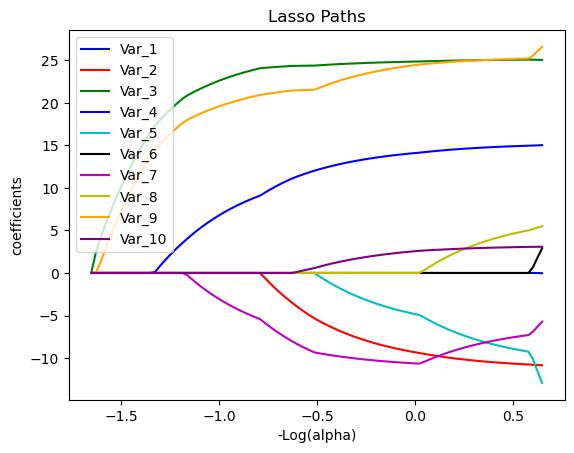

In [58]:
plt.figure(1)
colors = cycle(["b", "r", "g", "b", "c", "k", "m", "y", "orange", "purple"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for i, (coef_l, c) in enumerate(zip(coefs_lasso, colors)):
    plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=f"Var_{i+1}")

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso Paths")
plt.legend()
plt.show()